In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="LSTM seq 1024.", name="epoch 2000")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.LSTM(1024, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=2000, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1024)              4206592   
                                                                 
 dense (Dense)               (None, 25)                25625     
                                                                 
Total params: 4,232,217
Trainable params: 4,232,217
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/2000
1/5 [=====>........................] - ETA: 6s - loss: 1.5032 - mae: 1.1591

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 7s 1s/step - loss: 1.2388 - mae: 0.9788 - val_loss: 0.4644 - val_mae: 0.5749
Epoch 2/2000
1/5 [=====>........................] - ETA: 1s - loss: 0.3715 - mae: 0.4961

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.2607 - mae: 0.4110 - val_loss: 0.2334 - val_mae: 0.3938
Epoch 3/2000
3/5 [=================>............] - ETA: 0s - loss: 0.2173 - mae: 0.3921

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1971 - mae: 0.3698 - val_loss: 0.1975 - val_mae: 0.3714
Epoch 4/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.2316 - mae: 0.3982

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.1979 - mae: 0.3651 - val_loss: 0.1747 - val_mae: 0.3496
Epoch 5/2000
5/5 [==============================] - 1s 95ms/step - loss: 0.1789 - mae: 0.3508 - val_loss: 0.1853 - val_mae: 0.3549
Epoch 6/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.2078 - mae: 0.3847

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1803 - mae: 0.3518 - val_loss: 0.1737 - val_mae: 0.3498
Epoch 7/2000
5/5 [==============================] - ETA: 0s - loss: 0.1787 - mae: 0.3509

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.1787 - mae: 0.3509 - val_loss: 0.1725 - val_mae: 0.3479
Epoch 8/2000
5/5 [==============================] - 1s 100ms/step - loss: 0.1752 - mae: 0.3467 - val_loss: 0.1732 - val_mae: 0.3460
Epoch 9/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.1739 - mae: 0.3419

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1740 - mae: 0.3450 - val_loss: 0.1676 - val_mae: 0.3424
Epoch 10/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1707 - mae: 0.3444

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.1687 - mae: 0.3412 - val_loss: 0.1615 - val_mae: 0.3358
Epoch 11/2000
3/5 [=================>............] - ETA: 0s - loss: 0.1636 - mae: 0.3368

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1604 - mae: 0.3316 - val_loss: 0.1433 - val_mae: 0.3137
Epoch 12/2000
5/5 [==============================] - 1s 76ms/step - loss: 0.1830 - mae: 0.3475 - val_loss: 0.1601 - val_mae: 0.3351
Epoch 13/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.1800 - mae: 0.3510 - val_loss: 0.1602 - val_mae: 0.3318
Epoch 14/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.1701 - mae: 0.3416 - val_loss: 0.1617 - val_mae: 0.3366
Epoch 15/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.1643 - mae: 0.3345 - val_loss: 0.1627 - val_mae: 0.3335
Epoch 16/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.1567 - mae: 0.3278 - val_loss: 0.1471 - val_mae: 0.3213
Epoch 17/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.1176 - mae: 0.2813

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1407 - mae: 0.3103 - val_loss: 0.1398 - val_mae: 0.3070
Epoch 18/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1231 - mae: 0.2849

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.1197 - mae: 0.2809 - val_loss: 0.1219 - val_mae: 0.2818
Epoch 19/2000
5/5 [==============================] - ETA: 0s - loss: 0.1449 - mae: 0.3025

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1449 - mae: 0.3025 - val_loss: 0.1138 - val_mae: 0.2805
Epoch 20/2000
5/5 [==============================] - 1s 114ms/step - loss: 0.1356 - mae: 0.3004 - val_loss: 0.1276 - val_mae: 0.2990
Epoch 21/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.1337 - mae: 0.3009 - val_loss: 0.1230 - val_mae: 0.2908
Epoch 22/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.1232 - mae: 0.2862

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1192 - mae: 0.2849 - val_loss: 0.1072 - val_mae: 0.2721
Epoch 23/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0990 - mae: 0.2576

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0961 - mae: 0.2530 - val_loss: 0.0713 - val_mae: 0.2159
Epoch 24/2000
2/5 [===========>..................] - ETA: 0s - loss: 0.0734 - mae: 0.2160

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.0781 - mae: 0.2219 - val_loss: 0.0643 - val_mae: 0.1991
Epoch 25/2000
5/5 [==============================] - 1s 110ms/step - loss: 0.0667 - mae: 0.2026 - val_loss: 0.0656 - val_mae: 0.1983
Epoch 26/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0736 - mae: 0.2092

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0644 - mae: 0.1958 - val_loss: 0.0607 - val_mae: 0.1887
Epoch 27/2000
5/5 [==============================] - 1s 138ms/step - loss: 0.0637 - mae: 0.1978 - val_loss: 0.0660 - val_mae: 0.1949
Epoch 28/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.0666 - mae: 0.2014 - val_loss: 0.0612 - val_mae: 0.1918
Epoch 29/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0630 - mae: 0.1943 - val_loss: 0.0681 - val_mae: 0.2096
Epoch 30/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.0678 - mae: 0.2036 - val_loss: 0.0631 - val_mae: 0.1954
Epoch 31/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0676 - mae: 0.2024 - val_loss: 0.0651 - val_mae: 0.2008
Epoch 32/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0667 - mae: 0.2042

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0666 - mae: 0.2000 - val_loss: 0.0578 - val_mae: 0.1856
Epoch 33/2000
5/5 [==============================] - 1s 157ms/step - loss: 0.0676 - mae: 0.2019 - val_loss: 0.0600 - val_mae: 0.1868
Epoch 34/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0674 - mae: 0.2005 - val_loss: 0.0587 - val_mae: 0.1866
Epoch 35/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0634 - mae: 0.1952 - val_loss: 0.0594 - val_mae: 0.1865
Epoch 36/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0587 - mae: 0.1839

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0608 - mae: 0.1894 - val_loss: 0.0575 - val_mae: 0.1829
Epoch 37/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0588 - mae: 0.1852

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0583 - mae: 0.1844 - val_loss: 0.0569 - val_mae: 0.1834
Epoch 38/2000
5/5 [==============================] - 1s 103ms/step - loss: 0.0570 - mae: 0.1828 - val_loss: 0.0576 - val_mae: 0.1846
Epoch 39/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0570 - mae: 0.1828 - val_loss: 0.0569 - val_mae: 0.1840
Epoch 40/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0606 - mae: 0.1904

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0577 - mae: 0.1833 - val_loss: 0.0565 - val_mae: 0.1835
Epoch 41/2000
5/5 [==============================] - 1s 133ms/step - loss: 0.0575 - mae: 0.1834 - val_loss: 0.0600 - val_mae: 0.1917
Epoch 42/2000
5/5 [==============================] - 0s 96ms/step - loss: 0.0597 - mae: 0.1875 - val_loss: 0.0661 - val_mae: 0.2051
Epoch 43/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0624 - mae: 0.1938 - val_loss: 0.0621 - val_mae: 0.1967
Epoch 44/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0602 - mae: 0.1890 - val_loss: 0.0570 - val_mae: 0.1845
Epoch 45/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0583 - mae: 0.1855 - val_loss: 0.0569 - val_mae: 0.1825
Epoch 46/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0577 - mae: 0.1841 - val_loss: 0.0566 - val_mae: 0.1824
Epoch 47/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0573 - mae: 0.1

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0585 - mae: 0.1862 - val_loss: 0.0560 - val_mae: 0.1816
Epoch 49/2000
5/5 [==============================] - 1s 109ms/step - loss: 0.0570 - mae: 0.1831 - val_loss: 0.0569 - val_mae: 0.1809
Epoch 50/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0588 - mae: 0.1858 - val_loss: 0.0578 - val_mae: 0.1837
Epoch 51/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0564 - mae: 0.1817 - val_loss: 0.0562 - val_mae: 0.1823
Epoch 52/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0498 - mae: 0.1693

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0563 - mae: 0.1815 - val_loss: 0.0556 - val_mae: 0.1811
Epoch 53/2000
5/5 [==============================] - 1s 111ms/step - loss: 0.0555 - mae: 0.1796 - val_loss: 0.0590 - val_mae: 0.1842
Epoch 54/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0568 - mae: 0.1833 - val_loss: 0.0585 - val_mae: 0.1834
Epoch 55/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0567 - mae: 0.1832 - val_loss: 0.0558 - val_mae: 0.1798
Epoch 56/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0560 - mae: 0.1810 - val_loss: 0.0586 - val_mae: 0.1843
Epoch 57/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0572 - mae: 0.1831 - val_loss: 0.0579 - val_mae: 0.1864
Epoch 58/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0573 - mae: 0.1835 - val_loss: 0.0583 - val_mae: 0.1878
Epoch 59/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0580 - mae: 0.1

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0567 - mae: 0.1824 - val_loss: 0.0554 - val_mae: 0.1798
Epoch 65/2000
5/5 [==============================] - 1s 122ms/step - loss: 0.0567 - mae: 0.1828 - val_loss: 0.0573 - val_mae: 0.1824
Epoch 66/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0560 - mae: 0.1817 - val_loss: 0.0573 - val_mae: 0.1820
Epoch 67/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.0565 - mae: 0.1813 - val_loss: 0.0563 - val_mae: 0.1811
Epoch 68/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0558 - mae: 0.1811 - val_loss: 0.0567 - val_mae: 0.1829
Epoch 69/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0561 - mae: 0.1813 - val_loss: 0.0594 - val_mae: 0.1899
Epoch 70/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0578 - mae: 0.1841 - val_loss: 0.0572 - val_mae: 0.1851
Epoch 71/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0583 - mae: 0.1

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0583 - mae: 0.1867 - val_loss: 0.0554 - val_mae: 0.1789
Epoch 74/2000
5/5 [==============================] - 0s 102ms/step - loss: 0.0565 - mae: 0.1820 - val_loss: 0.0566 - val_mae: 0.1831
Epoch 75/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0564 - mae: 0.1820 - val_loss: 0.0586 - val_mae: 0.1901
Epoch 76/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0585 - mae: 0.1877 - val_loss: 0.0565 - val_mae: 0.1827
Epoch 77/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0542 - mae: 0.1782

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0557 - mae: 0.1812 - val_loss: 0.0552 - val_mae: 0.1789
Epoch 78/2000
5/5 [==============================] - 0s 97ms/step - loss: 0.0552 - mae: 0.1788 - val_loss: 0.0567 - val_mae: 0.1810
Epoch 79/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0552 - mae: 0.1802 - val_loss: 0.0567 - val_mae: 0.1844
Epoch 80/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0552 - mae: 0.1804 - val_loss: 0.0572 - val_mae: 0.1856
Epoch 81/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0572 - mae: 0.1844 - val_loss: 0.0572 - val_mae: 0.1849
Epoch 82/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0562 - mae: 0.1820 - val_loss: 0.0552 - val_mae: 0.1793
Epoch 83/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0498 - mae: 0.1711

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0554 - mae: 0.1797 - val_loss: 0.0546 - val_mae: 0.1785
Epoch 84/2000
5/5 [==============================] - 1s 109ms/step - loss: 0.0536 - mae: 0.1767 - val_loss: 0.0568 - val_mae: 0.1842
Epoch 85/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0551 - mae: 0.1801 - val_loss: 0.0562 - val_mae: 0.1830
Epoch 86/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0564 - mae: 0.1827 - val_loss: 0.0560 - val_mae: 0.1804
Epoch 87/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0554 - mae: 0.1810 - val_loss: 0.0579 - val_mae: 0.1826
Epoch 88/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0571 - mae: 0.1840 - val_loss: 0.0622 - val_mae: 0.1892
Epoch 89/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0569 - mae: 0.1832 - val_loss: 0.0556 - val_mae: 0.1809
Epoch 90/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0562 - mae: 0.1

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0542 - mae: 0.1781 - val_loss: 0.0539 - val_mae: 0.1765
Epoch 99/2000
5/5 [==============================] - 1s 132ms/step - loss: 0.0534 - mae: 0.1769 - val_loss: 0.0569 - val_mae: 0.1808
Epoch 100/2000
5/5 [==============================] - 0s 93ms/step - loss: 0.0541 - mae: 0.1786 - val_loss: 0.0584 - val_mae: 0.1848
Epoch 101/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0542 - mae: 0.1795 - val_loss: 0.0569 - val_mae: 0.1805
Epoch 102/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0528 - mae: 0.1770 - val_loss: 0.0565 - val_mae: 0.1803
Epoch 103/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0529 - mae: 0.1759

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 998ms/step - loss: 0.0523 - mae: 0.1748 - val_loss: 0.0531 - val_mae: 0.1754
Epoch 104/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0509 - mae: 0.1726

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0507 - mae: 0.1730 - val_loss: 0.0530 - val_mae: 0.1761
Epoch 105/2000
2/5 [===========>..................] - ETA: 0s - loss: 0.0505 - mae: 0.1703

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0501 - mae: 0.1712 - val_loss: 0.0514 - val_mae: 0.1732
Epoch 106/2000
5/5 [==============================] - 0s 91ms/step - loss: 0.0489 - mae: 0.1700 - val_loss: 0.0514 - val_mae: 0.1727
Epoch 107/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0479 - mae: 0.1686 - val_loss: 0.0519 - val_mae: 0.1744
Epoch 108/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0450 - mae: 0.1643

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0473 - mae: 0.1678 - val_loss: 0.0495 - val_mae: 0.1693
Epoch 109/2000
5/5 [==============================] - 1s 117ms/step - loss: 0.0472 - mae: 0.1675 - val_loss: 0.0543 - val_mae: 0.1789
Epoch 110/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0473 - mae: 0.1680

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0490 - mae: 0.1710 - val_loss: 0.0487 - val_mae: 0.1705
Epoch 111/2000
2/5 [===========>..................] - ETA: 0s - loss: 0.0435 - mae: 0.1609

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0470 - mae: 0.1678 - val_loss: 0.0477 - val_mae: 0.1702
Epoch 112/2000
5/5 [==============================] - 0s 99ms/step - loss: 0.0466 - mae: 0.1667 - val_loss: 0.0496 - val_mae: 0.1719
Epoch 113/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0436 - mae: 0.1661

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.2s


5/5 [==============================] - 4s 1s/step - loss: 0.0483 - mae: 0.1707 - val_loss: 0.0471 - val_mae: 0.1710
Epoch 114/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0460 - mae: 0.1670

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0462 - mae: 0.1670 - val_loss: 0.0456 - val_mae: 0.1638
Epoch 115/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0438 - mae: 0.1615

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.0444 - mae: 0.1623 - val_loss: 0.0453 - val_mae: 0.1639
Epoch 116/2000
5/5 [==============================] - 1s 109ms/step - loss: 0.0444 - mae: 0.1620 - val_loss: 0.0459 - val_mae: 0.1652
Epoch 117/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0430 - mae: 0.1630

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0442 - mae: 0.1614 - val_loss: 0.0444 - val_mae: 0.1623
Epoch 118/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0427 - mae: 0.1583

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0426 - mae: 0.1584 - val_loss: 0.0443 - val_mae: 0.1614
Epoch 119/2000
2/5 [===========>..................] - ETA: 0s - loss: 0.0432 - mae: 0.1612

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0432 - mae: 0.1596 - val_loss: 0.0435 - val_mae: 0.1600
Epoch 120/2000
5/5 [==============================] - 1s 107ms/step - loss: 0.0429 - mae: 0.1595 - val_loss: 0.0450 - val_mae: 0.1620
Epoch 121/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0424 - mae: 0.1573 - val_loss: 0.0446 - val_mae: 0.1620
Epoch 122/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0431 - mae: 0.1597 - val_loss: 0.0440 - val_mae: 0.1604
Epoch 123/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0431 - mae: 0.1598 - val_loss: 0.0451 - val_mae: 0.1621
Epoch 124/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0433 - mae: 0.1585 - val_loss: 0.0441 - val_mae: 0.1595
Epoch 125/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0430 - mae: 0.1571

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0415 - mae: 0.1557 - val_loss: 0.0426 - val_mae: 0.1583
Epoch 126/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.0420 - mae: 0.1573 - val_loss: 0.0433 - val_mae: 0.1586
Epoch 127/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0423 - mae: 0.1570 - val_loss: 0.0427 - val_mae: 0.1571
Epoch 128/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0407 - mae: 0.1513

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 997ms/step - loss: 0.0407 - mae: 0.1538 - val_loss: 0.0419 - val_mae: 0.1574
Epoch 129/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0398 - mae: 0.1528

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0404 - mae: 0.1536 - val_loss: 0.0419 - val_mae: 0.1553
Epoch 130/2000
5/5 [==============================] - 1s 122ms/step - loss: 0.0409 - mae: 0.1546 - val_loss: 0.0422 - val_mae: 0.1559
Epoch 131/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0394 - mae: 0.1518 - val_loss: 0.0426 - val_mae: 0.1580
Epoch 132/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0403 - mae: 0.1535

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0393 - mae: 0.1510 - val_loss: 0.0414 - val_mae: 0.1527
Epoch 133/2000
5/5 [==============================] - ETA: 0s - loss: 0.0389 - mae: 0.1493

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0389 - mae: 0.1493 - val_loss: 0.0389 - val_mae: 0.1471
Epoch 134/2000
5/5 [==============================] - 0s 96ms/step - loss: 0.0383 - mae: 0.1484 - val_loss: 0.0390 - val_mae: 0.1516
Epoch 135/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0373 - mae: 0.1503 - val_loss: 0.0449 - val_mae: 0.1601
Epoch 136/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0387 - mae: 0.1488 - val_loss: 0.0410 - val_mae: 0.1610
Epoch 137/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0388 - mae: 0.1483 - val_loss: 0.0648 - val_mae: 0.1952
Epoch 138/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0455 - mae: 0.1648 - val_loss: 0.0443 - val_mae: 0.1658
Epoch 139/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0411 - mae: 0.1563 - val_loss: 0.0432 - val_mae: 0.1584
Epoch 140/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0383 - mae: 0.

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 994ms/step - loss: 0.0403 - mae: 0.1555 - val_loss: 0.0388 - val_mae: 0.1535
Epoch 141/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0364 - mae: 0.1477

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0363 - mae: 0.1475 - val_loss: 0.0352 - val_mae: 0.1448
Epoch 142/2000
2/5 [===========>..................] - ETA: 0s - loss: 0.0335 - mae: 0.1405

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0326 - mae: 0.1383 - val_loss: 0.0324 - val_mae: 0.1389
Epoch 143/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0323 - mae: 0.1388

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0323 - mae: 0.1379 - val_loss: 0.0318 - val_mae: 0.1346
Epoch 144/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.0310 - mae: 0.1329 - val_loss: 0.0321 - val_mae: 0.1377
Epoch 145/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0306 - mae: 0.1335 - val_loss: 0.0324 - val_mae: 0.1385
Epoch 146/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0286 - mae: 0.1327

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 968ms/step - loss: 0.0307 - mae: 0.1341 - val_loss: 0.0317 - val_mae: 0.1388
Epoch 147/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0299 - mae: 0.1325

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0301 - mae: 0.1328 - val_loss: 0.0309 - val_mae: 0.1343
Epoch 148/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0282 - mae: 0.1261

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0295 - mae: 0.1297 - val_loss: 0.0308 - val_mae: 0.1348
Epoch 149/2000
5/5 [==============================] - 0s 89ms/step - loss: 0.0293 - mae: 0.1299 - val_loss: 0.0313 - val_mae: 0.1376
Epoch 150/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0296 - mae: 0.1356

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0299 - mae: 0.1331 - val_loss: 0.0296 - val_mae: 0.1299
Epoch 151/2000
5/5 [==============================] - 1s 109ms/step - loss: 0.0290 - mae: 0.1279 - val_loss: 0.0317 - val_mae: 0.1340
Epoch 152/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0300 - mae: 0.1323 - val_loss: 0.0299 - val_mae: 0.1322
Epoch 153/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0286 - mae: 0.1287 - val_loss: 0.0304 - val_mae: 0.1342
Epoch 154/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0290 - mae: 0.1302 - val_loss: 0.0304 - val_mae: 0.1351
Epoch 155/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0297 - mae: 0.1320

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0285 - mae: 0.1282 - val_loss: 0.0293 - val_mae: 0.1310
Epoch 156/2000
5/5 [==============================] - ETA: 0s - loss: 0.0285 - mae: 0.1274

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0285 - mae: 0.1274 - val_loss: 0.0292 - val_mae: 0.1311
Epoch 157/2000
5/5 [==============================] - 1s 98ms/step - loss: 0.0280 - mae: 0.1263 - val_loss: 0.0294 - val_mae: 0.1307
Epoch 158/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0283 - mae: 0.1268 - val_loss: 0.0293 - val_mae: 0.1308
Epoch 159/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0257 - mae: 0.1246

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 966ms/step - loss: 0.0275 - mae: 0.1255 - val_loss: 0.0285 - val_mae: 0.1291
Epoch 160/2000
5/5 [==============================] - 1s 121ms/step - loss: 0.0276 - mae: 0.1263 - val_loss: 0.0285 - val_mae: 0.1288
Epoch 161/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0274 - mae: 0.1252 - val_loss: 0.0289 - val_mae: 0.1306
Epoch 162/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0275 - mae: 0.1263 - val_loss: 0.0287 - val_mae: 0.1284
Epoch 163/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0275 - mae: 0.1268 - val_loss: 0.0291 - val_mae: 0.1279
Epoch 164/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0249 - mae: 0.1175

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0270 - mae: 0.1249 - val_loss: 0.0284 - val_mae: 0.1308
Epoch 165/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0267 - mae: 0.1243

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0263 - mae: 0.1237 - val_loss: 0.0278 - val_mae: 0.1304
Epoch 166/2000
5/5 [==============================] - 1s 98ms/step - loss: 0.0276 - mae: 0.1259 - val_loss: 0.0292 - val_mae: 0.1339
Epoch 167/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0269 - mae: 0.1264 - val_loss: 0.0285 - val_mae: 0.1344
Epoch 168/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0230 - mae: 0.1195

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0262 - mae: 0.1241 - val_loss: 0.0271 - val_mae: 0.1283
Epoch 169/2000
5/5 [==============================] - 1s 116ms/step - loss: 0.0253 - mae: 0.1220 - val_loss: 0.0278 - val_mae: 0.1319
Epoch 170/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0260 - mae: 0.1287

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0253 - mae: 0.1232 - val_loss: 0.0246 - val_mae: 0.1227
Epoch 171/2000
5/5 [==============================] - 1s 131ms/step - loss: 0.0245 - mae: 0.1205 - val_loss: 0.0263 - val_mae: 0.1262
Epoch 172/2000
5/5 [==============================] - 0s 93ms/step - loss: 0.0242 - mae: 0.1205 - val_loss: 0.0266 - val_mae: 0.1277
Epoch 173/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0238 - mae: 0.1202

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0241 - mae: 0.1205 - val_loss: 0.0244 - val_mae: 0.1216
Epoch 174/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0236 - mae: 0.1191

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 999ms/step - loss: 0.0230 - mae: 0.1169 - val_loss: 0.0224 - val_mae: 0.1173
Epoch 175/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0217 - mae: 0.1161

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.0218 - mae: 0.1145 - val_loss: 0.0218 - val_mae: 0.1138
Epoch 176/2000
5/5 [==============================] - 0s 104ms/step - loss: 0.0406 - mae: 0.1499 - val_loss: 0.0654 - val_mae: 0.2026
Epoch 177/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0745 - mae: 0.2133 - val_loss: 0.1517 - val_mae: 0.3256
Epoch 178/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.1191 - mae: 0.2820 - val_loss: 0.1292 - val_mae: 0.2927
Epoch 179/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.1104 - mae: 0.2676 - val_loss: 0.0704 - val_mae: 0.2126
Epoch 180/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0668 - mae: 0.2023 - val_loss: 0.0682 - val_mae: 0.2055
Epoch 181/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0632 - mae: 0.1983 - val_loss: 0.0593 - val_mae: 0.1884
Epoch 182/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0595 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0194 - mae: 0.1087 - val_loss: 0.0214 - val_mae: 0.1147
Epoch 225/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0179 - mae: 0.1062

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0184 - mae: 0.1073 - val_loss: 0.0197 - val_mae: 0.1112
Epoch 226/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0182 - mae: 0.1072

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0182 - mae: 0.1054 - val_loss: 0.0187 - val_mae: 0.1093
Epoch 227/2000
5/5 [==============================] - 1s 126ms/step - loss: 0.0172 - mae: 0.1039 - val_loss: 0.0194 - val_mae: 0.1107
Epoch 228/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0163 - mae: 0.1008

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0165 - mae: 0.1012 - val_loss: 0.0175 - val_mae: 0.1058
Epoch 229/2000
5/5 [==============================] - 1s 110ms/step - loss: 0.0158 - mae: 0.0994 - val_loss: 0.0199 - val_mae: 0.1063
Epoch 230/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0160 - mae: 0.0988 - val_loss: 0.0191 - val_mae: 0.1048
Epoch 231/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0176 - mae: 0.1029

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0152 - mae: 0.0963 - val_loss: 0.0167 - val_mae: 0.1010
Epoch 232/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0137 - mae: 0.0925

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0142 - mae: 0.0940 - val_loss: 0.0160 - val_mae: 0.0992
Epoch 233/2000
5/5 [==============================] - 1s 107ms/step - loss: 0.0137 - mae: 0.0921 - val_loss: 0.0199 - val_mae: 0.1115
Epoch 234/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0174 - mae: 0.1052

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 989ms/step - loss: 0.0152 - mae: 0.0981 - val_loss: 0.0154 - val_mae: 0.0977
Epoch 235/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0135 - mae: 0.0915

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0135 - mae: 0.0913 - val_loss: 0.0141 - val_mae: 0.0921
Epoch 236/2000
5/5 [==============================] - ETA: 0s - loss: 0.0126 - mae: 0.0891

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0126 - mae: 0.0891 - val_loss: 0.0140 - val_mae: 0.0928
Epoch 237/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0116 - mae: 0.0845

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0117 - mae: 0.0853 - val_loss: 0.0140 - val_mae: 0.0923
Epoch 238/2000
2/5 [===========>..................] - ETA: 0s - loss: 0.0124 - mae: 0.0882

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0117 - mae: 0.0859 - val_loss: 0.0136 - val_mae: 0.0901
Epoch 239/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0113 - mae: 0.0834

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 990ms/step - loss: 0.0114 - mae: 0.0840 - val_loss: 0.0134 - val_mae: 0.0912
Epoch 240/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0111 - mae: 0.0830

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0109 - mae: 0.0824 - val_loss: 0.0129 - val_mae: 0.0879
Epoch 241/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0107 - mae: 0.0817

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0104 - mae: 0.0803 - val_loss: 0.0129 - val_mae: 0.0875
Epoch 242/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0104 - mae: 0.0807

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0102 - mae: 0.0797 - val_loss: 0.0126 - val_mae: 0.0871
Epoch 243/2000
5/5 [==============================] - 1s 117ms/step - loss: 0.0105 - mae: 0.0808 - val_loss: 0.0156 - val_mae: 0.0977
Epoch 244/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0111 - mae: 0.0839 - val_loss: 0.0142 - val_mae: 0.0908
Epoch 245/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0120 - mae: 0.0849

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 975ms/step - loss: 0.0106 - mae: 0.0812 - val_loss: 0.0113 - val_mae: 0.0830
Epoch 246/2000
5/5 [==============================] - 1s 119ms/step - loss: 0.0095 - mae: 0.0770 - val_loss: 0.0114 - val_mae: 0.0840
Epoch 247/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0090 - mae: 0.0754 - val_loss: 0.0123 - val_mae: 0.0866
Epoch 248/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0090 - mae: 0.0747 - val_loss: 0.0115 - val_mae: 0.0850
Epoch 249/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0091 - mae: 0.0754

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0087 - mae: 0.0737 - val_loss: 0.0107 - val_mae: 0.0813
Epoch 250/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0081 - mae: 0.0711

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0082 - mae: 0.0712 - val_loss: 0.0099 - val_mae: 0.0777
Epoch 251/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0078 - mae: 0.0700

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0079 - mae: 0.0699 - val_loss: 0.0098 - val_mae: 0.0778
Epoch 252/2000
2/5 [===========>..................] - ETA: 0s - loss: 0.0079 - mae: 0.0700

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0079 - mae: 0.0705 - val_loss: 0.0094 - val_mae: 0.0767
Epoch 253/2000
5/5 [==============================] - 0s 87ms/step - loss: 0.0075 - mae: 0.0689 - val_loss: 0.0098 - val_mae: 0.0776
Epoch 254/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0078 - mae: 0.0698 - val_loss: 0.0094 - val_mae: 0.0769
Epoch 255/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0076 - mae: 0.0694 - val_loss: 0.0095 - val_mae: 0.0773
Epoch 256/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0075 - mae: 0.0694 - val_loss: 0.0096 - val_mae: 0.0775
Epoch 257/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0076 - mae: 0.0694 - val_loss: 0.0100 - val_mae: 0.0790
Epoch 258/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0065 - mae: 0.0632

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 991ms/step - loss: 0.0072 - mae: 0.0678 - val_loss: 0.0089 - val_mae: 0.0748
Epoch 259/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0069 - mae: 0.0661

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.0070 - mae: 0.0665 - val_loss: 0.0084 - val_mae: 0.0722
Epoch 260/2000
5/5 [==============================] - 0s 87ms/step - loss: 0.0070 - mae: 0.0670 - val_loss: 0.0094 - val_mae: 0.0769
Epoch 261/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0075 - mae: 0.0696 - val_loss: 0.0099 - val_mae: 0.0786
Epoch 262/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0071 - mae: 0.0674 - val_loss: 0.0088 - val_mae: 0.0744
Epoch 263/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0070 - mae: 0.0666

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0067 - mae: 0.0654 - val_loss: 0.0083 - val_mae: 0.0724
Epoch 264/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0066 - mae: 0.0657

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0066 - mae: 0.0655 - val_loss: 0.0082 - val_mae: 0.0721
Epoch 265/2000
2/5 [===========>..................] - ETA: 0s - loss: 0.0065 - mae: 0.0648

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0065 - mae: 0.0650 - val_loss: 0.0080 - val_mae: 0.0717
Epoch 266/2000
5/5 [==============================] - 1s 118ms/step - loss: 0.0064 - mae: 0.0644 - val_loss: 0.0089 - val_mae: 0.0751
Epoch 267/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0065 - mae: 0.0652 - val_loss: 0.0087 - val_mae: 0.0744
Epoch 268/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0065 - mae: 0.0649 - val_loss: 0.0095 - val_mae: 0.0783
Epoch 269/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0072 - mae: 0.0696

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 966ms/step - loss: 0.0067 - mae: 0.0666 - val_loss: 0.0080 - val_mae: 0.0718
Epoch 270/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0062 - mae: 0.0638

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0062 - mae: 0.0638 - val_loss: 0.0079 - val_mae: 0.0713
Epoch 271/2000
5/5 [==============================] - 1s 97ms/step - loss: 0.0062 - mae: 0.0634 - val_loss: 0.0081 - val_mae: 0.0723
Epoch 272/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0060 - mae: 0.0628 - val_loss: 0.0081 - val_mae: 0.0728
Epoch 273/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0062 - mae: 0.0635 - val_loss: 0.0080 - val_mae: 0.0716
Epoch 274/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0269 - mae: 0.1099 - val_loss: 0.0691 - val_mae: 0.2062
Epoch 275/2000
5/5 [==============================] - 0s 89ms/step - loss: 0.0616 - mae: 0.1943 - val_loss: 0.0576 - val_mae: 0.1860
Epoch 276/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0530 - mae: 0.1787 - val_loss: 0.0519 - val_mae: 0.1757
Epoch 277/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0822 - ma

Epoch 332/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0500 - mae: 0.1713 - val_loss: 0.0520 - val_mae: 0.1719
Epoch 333/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0502 - mae: 0.1708 - val_loss: 0.0531 - val_mae: 0.1729
Epoch 334/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0489 - mae: 0.1690 - val_loss: 0.0511 - val_mae: 0.1708
Epoch 335/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0486 - mae: 0.1669 - val_loss: 0.0513 - val_mae: 0.1708
Epoch 336/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0481 - mae: 0.1672 - val_loss: 0.0541 - val_mae: 0.1740
Epoch 337/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0483 - mae: 0.1668 - val_loss: 0.0511 - val_mae: 0.1699
Epoch 338/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0476 - mae: 0.1653 - val_loss: 0.0510 - val_mae: 0.1713
Epoch 339/2000
5/5 [==============================] - 0s 73ms/step - 

5/5 [==============================] - 0s 71ms/step - loss: 0.0317 - mae: 0.1367 - val_loss: 0.0360 - val_mae: 0.1499
Epoch 394/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0315 - mae: 0.1380 - val_loss: 0.0352 - val_mae: 0.1450
Epoch 395/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0308 - mae: 0.1335 - val_loss: 0.0347 - val_mae: 0.1455
Epoch 396/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0305 - mae: 0.1340 - val_loss: 0.0362 - val_mae: 0.1474
Epoch 397/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0306 - mae: 0.1337 - val_loss: 0.0341 - val_mae: 0.1455
Epoch 398/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0304 - mae: 0.1343 - val_loss: 0.0350 - val_mae: 0.1468
Epoch 399/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0303 - mae: 0.1332 - val_loss: 0.0350 - val_mae: 0.1442
Epoch 400/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0296 - 

Epoch 455/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0085 - mae: 0.0736 - val_loss: 0.0100 - val_mae: 0.0794
Epoch 456/2000
5/5 [==============================] - 0s 70ms/step - loss: 0.0081 - mae: 0.0718 - val_loss: 0.0100 - val_mae: 0.0792
Epoch 457/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0081 - mae: 0.0728 - val_loss: 0.0101 - val_mae: 0.0788
Epoch 458/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0079 - mae: 0.0705 - val_loss: 0.0098 - val_mae: 0.0786
Epoch 459/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0076 - mae: 0.0699 - val_loss: 0.0093 - val_mae: 0.0774
Epoch 460/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0075 - mae: 0.0699 - val_loss: 0.0090 - val_mae: 0.0752
Epoch 461/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0075 - mae: 0.0690 - val_loss: 0.0092 - val_mae: 0.0764
Epoch 462/2000
5/5 [==============================] - 0s 71ms/step - 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0062 - mae: 0.0632 - val_loss: 0.0078 - val_mae: 0.0708
Epoch 473/2000
5/5 [==============================] - 1s 133ms/step - loss: 0.0062 - mae: 0.0633 - val_loss: 0.0087 - val_mae: 0.0742
Epoch 474/2000
5/5 [==============================] - 0s 93ms/step - loss: 0.0063 - mae: 0.0635 - val_loss: 0.0079 - val_mae: 0.0710
Epoch 475/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0064 - mae: 0.0643 - val_loss: 0.0081 - val_mae: 0.0713
Epoch 476/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0060 - mae: 0.0621 - val_loss: 0.0079 - val_mae: 0.0705
Epoch 477/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0062 - mae: 0.0630 - val_loss: 0.0079 - val_mae: 0.0708
Epoch 478/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0056 - mae: 0.0599

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0060 - mae: 0.0621 - val_loss: 0.0076 - val_mae: 0.0695
Epoch 479/2000
5/5 [==============================] - 1s 129ms/step - loss: 0.0058 - mae: 0.0615 - val_loss: 0.0079 - val_mae: 0.0713
Epoch 480/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0057 - mae: 0.0604

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0058 - mae: 0.0612 - val_loss: 0.0075 - val_mae: 0.0686
Epoch 481/2000
5/5 [==============================] - 1s 110ms/step - loss: 0.0056 - mae: 0.0599 - val_loss: 0.0078 - val_mae: 0.0705
Epoch 482/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0056 - mae: 0.0603 - val_loss: 0.0075 - val_mae: 0.0691
Epoch 483/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0051 - mae: 0.0573

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0055 - mae: 0.0592 - val_loss: 0.0072 - val_mae: 0.0673
Epoch 484/2000
5/5 [==============================] - 0s 99ms/step - loss: 0.0055 - mae: 0.0598 - val_loss: 0.0082 - val_mae: 0.0714
Epoch 485/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0057 - mae: 0.0608 - val_loss: 0.0083 - val_mae: 0.0735
Epoch 486/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0061 - mae: 0.0625 - val_loss: 0.0078 - val_mae: 0.0701
Epoch 487/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0060 - mae: 0.0617 - val_loss: 0.0078 - val_mae: 0.0709
Epoch 488/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0056 - mae: 0.0600 - val_loss: 0.0074 - val_mae: 0.0685
Epoch 489/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0056 - mae: 0.0600 - val_loss: 0.0082 - val_mae: 0.0720
Epoch 490/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0064 - ma

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0057 - mae: 0.0603 - val_loss: 0.0071 - val_mae: 0.0673
Epoch 492/2000
5/5 [==============================] - 0s 110ms/step - loss: 0.0055 - mae: 0.0593 - val_loss: 0.0074 - val_mae: 0.0680
Epoch 493/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0053 - mae: 0.0578 - val_loss: 0.0072 - val_mae: 0.0677
Epoch 494/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0052 - mae: 0.0579 - val_loss: 0.0073 - val_mae: 0.0679
Epoch 495/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0052 - mae: 0.0576 - val_loss: 0.0073 - val_mae: 0.0679
Epoch 496/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0055 - mae: 0.0593 - val_loss: 0.0075 - val_mae: 0.0686
Epoch 497/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0057 - mae: 0.0601

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 997ms/step - loss: 0.0053 - mae: 0.0579 - val_loss: 0.0070 - val_mae: 0.0667
Epoch 498/2000
5/5 [==============================] - 1s 121ms/step - loss: 0.0051 - mae: 0.0575 - val_loss: 0.0074 - val_mae: 0.0687
Epoch 499/2000
5/5 [==============================] - 0s 95ms/step - loss: 0.0055 - mae: 0.0595 - val_loss: 0.0077 - val_mae: 0.0707
Epoch 500/2000
5/5 [==============================] - 0s 89ms/step - loss: 0.0054 - mae: 0.0588 - val_loss: 0.0071 - val_mae: 0.0670
Epoch 501/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0055 - mae: 0.0589 - val_loss: 0.0071 - val_mae: 0.0673
Epoch 502/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0059 - mae: 0.0627

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 962ms/step - loss: 0.0049 - mae: 0.0563 - val_loss: 0.0067 - val_mae: 0.0654
Epoch 503/2000
5/5 [==============================] - 1s 112ms/step - loss: 0.0050 - mae: 0.0565 - val_loss: 0.0071 - val_mae: 0.0664
Epoch 504/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0050 - mae: 0.0562 - val_loss: 0.0071 - val_mae: 0.0668
Epoch 505/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0051 - mae: 0.0571 - val_loss: 0.0068 - val_mae: 0.0657
Epoch 506/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0051 - mae: 0.0571 - val_loss: 0.0071 - val_mae: 0.0674
Epoch 507/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0056 - mae: 0.0603

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0051 - mae: 0.0571 - val_loss: 0.0066 - val_mae: 0.0647
Epoch 508/2000
5/5 [==============================] - 1s 132ms/step - loss: 0.0049 - mae: 0.0560 - val_loss: 0.0081 - val_mae: 0.0704
Epoch 509/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0052 - mae: 0.0578

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0052 - mae: 0.0576 - val_loss: 0.0066 - val_mae: 0.0648
Epoch 510/2000
5/5 [==============================] - 0s 93ms/step - loss: 0.0049 - mae: 0.0558 - val_loss: 0.0070 - val_mae: 0.0665
Epoch 511/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0048 - mae: 0.0552 - val_loss: 0.0072 - val_mae: 0.0675
Epoch 512/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0049 - mae: 0.0559 - val_loss: 0.0067 - val_mae: 0.0654
Epoch 513/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0048 - mae: 0.0556 - val_loss: 0.0074 - val_mae: 0.0679
Epoch 514/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0047 - mae: 0.0550 - val_loss: 0.0067 - val_mae: 0.0651
Epoch 515/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0046 - mae: 0.0541 - val_loss: 0.0067 - val_mae: 0.0648
Epoch 516/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0049 - mae: 0.

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 996ms/step - loss: 0.0047 - mae: 0.0547 - val_loss: 0.0065 - val_mae: 0.0641
Epoch 517/2000
5/5 [==============================] - 1s 125ms/step - loss: 0.0045 - mae: 0.0535 - val_loss: 0.0068 - val_mae: 0.0658
Epoch 518/2000
5/5 [==============================] - 0s 95ms/step - loss: 0.0046 - mae: 0.0539 - val_loss: 0.0066 - val_mae: 0.0643
Epoch 519/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0044 - mae: 0.0534 - val_loss: 0.0065 - val_mae: 0.0642
Epoch 520/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0044 - mae: 0.0532 - val_loss: 0.0066 - val_mae: 0.0645
Epoch 521/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0046 - mae: 0.0539 - val_loss: 0.0072 - val_mae: 0.0675
Epoch 522/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0053 - mae: 0.0587 - val_loss: 0.0078 - val_mae: 0.0692
Epoch 523/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.0060 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0046 - mae: 0.0542 - val_loss: 0.0064 - val_mae: 0.0640
Epoch 531/2000
5/5 [==============================] - 1s 120ms/step - loss: 0.0045 - mae: 0.0536 - val_loss: 0.0066 - val_mae: 0.0639
Epoch 532/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0044 - mae: 0.0523

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 994ms/step - loss: 0.0045 - mae: 0.0532 - val_loss: 0.0062 - val_mae: 0.0621
Epoch 533/2000
5/5 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0527

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0044 - mae: 0.0527 - val_loss: 0.0061 - val_mae: 0.0616
Epoch 534/2000
5/5 [==============================] - 1s 118ms/step - loss: 0.0043 - mae: 0.0525 - val_loss: 0.0062 - val_mae: 0.0622
Epoch 535/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0040 - mae: 0.0507 - val_loss: 0.0064 - val_mae: 0.0637
Epoch 536/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0044 - mae: 0.0527 - val_loss: 0.0062 - val_mae: 0.0626
Epoch 537/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.0043 - mae: 0.0521 - val_loss: 0.0063 - val_mae: 0.0632
Epoch 538/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0045 - mae: 0.0533

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 961ms/step - loss: 0.0042 - mae: 0.0519 - val_loss: 0.0059 - val_mae: 0.0615
Epoch 539/2000
5/5 [==============================] - 1s 130ms/step - loss: 0.0041 - mae: 0.0512 - val_loss: 0.0061 - val_mae: 0.0621
Epoch 540/2000
5/5 [==============================] - 0s 93ms/step - loss: 0.0041 - mae: 0.0509 - val_loss: 0.0062 - val_mae: 0.0622
Epoch 541/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.0041 - mae: 0.0506 - val_loss: 0.0060 - val_mae: 0.0616
Epoch 542/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0039 - mae: 0.0501 - val_loss: 0.0064 - val_mae: 0.0640
Epoch 543/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0042 - mae: 0.0513 - val_loss: 0.0064 - val_mae: 0.0635
Epoch 544/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.0042 - mae: 0.0519 - val_loss: 0.0067 - val_mae: 0.0642
Epoch 545/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0042 - mae

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0042 - mae: 0.0511 - val_loss: 0.0058 - val_mae: 0.0609
Epoch 546/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0038 - mae: 0.0491

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0037 - mae: 0.0489 - val_loss: 0.0058 - val_mae: 0.0598
Epoch 547/2000
2/5 [===========>..................] - ETA: 0s - loss: 0.0038 - mae: 0.0497

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 983ms/step - loss: 0.0038 - mae: 0.0490 - val_loss: 0.0057 - val_mae: 0.0599
Epoch 548/2000
5/5 [==============================] - 0s 96ms/step - loss: 0.0036 - mae: 0.0480 - val_loss: 0.0057 - val_mae: 0.0599
Epoch 549/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0036 - mae: 0.0483

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0037 - mae: 0.0482 - val_loss: 0.0056 - val_mae: 0.0588
Epoch 550/2000
5/5 [==============================] - 0s 105ms/step - loss: 0.0036 - mae: 0.0476 - val_loss: 0.0056 - val_mae: 0.0594
Epoch 551/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0036 - mae: 0.0475 - val_loss: 0.0059 - val_mae: 0.0611
Epoch 552/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.0038 - mae: 0.0485 - val_loss: 0.0058 - val_mae: 0.0604
Epoch 553/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0037 - mae: 0.0485 - val_loss: 0.0058 - val_mae: 0.0598
Epoch 554/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0036 - mae: 0.0476 - val_loss: 0.0059 - val_mae: 0.0603
Epoch 555/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0037 - mae: 0.0482 - val_loss: 0.0057 - val_mae: 0.0595
Epoch 556/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0036 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0037 - mae: 0.0490 - val_loss: 0.0055 - val_mae: 0.0586
Epoch 574/2000
5/5 [==============================] - 1s 129ms/step - loss: 0.0037 - mae: 0.0481 - val_loss: 0.0060 - val_mae: 0.0611
Epoch 575/2000
5/5 [==============================] - 0s 95ms/step - loss: 0.0038 - mae: 0.0494 - val_loss: 0.0058 - val_mae: 0.0604
Epoch 576/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.0040 - mae: 0.0501 - val_loss: 0.0059 - val_mae: 0.0605
Epoch 577/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0035 - mae: 0.0478 - val_loss: 0.0057 - val_mae: 0.0597
Epoch 578/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0036 - mae: 0.0480 - val_loss: 0.0058 - val_mae: 0.0602
Epoch 579/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0038 - mae: 0.0492

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0036 - mae: 0.0479 - val_loss: 0.0053 - val_mae: 0.0583
Epoch 580/2000
5/5 [==============================] - 1s 129ms/step - loss: 0.0035 - mae: 0.0471 - val_loss: 0.0057 - val_mae: 0.0600
Epoch 581/2000
5/5 [==============================] - 0s 93ms/step - loss: 0.0036 - mae: 0.0477 - val_loss: 0.0054 - val_mae: 0.0583
Epoch 582/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0036 - mae: 0.0474 - val_loss: 0.0056 - val_mae: 0.0598
Epoch 583/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0039 - mae: 0.0494 - val_loss: 0.0056 - val_mae: 0.0596
Epoch 584/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0035 - mae: 0.0473 - val_loss: 0.0057 - val_mae: 0.0597
Epoch 585/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0035 - mae: 0.0468 - val_loss: 0.0060 - val_mae: 0.0611
Epoch 586/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0036 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 996ms/step - loss: 0.0037 - mae: 0.0483 - val_loss: 0.0053 - val_mae: 0.0578
Epoch 590/2000
5/5 [==============================] - 1s 126ms/step - loss: 0.0034 - mae: 0.0466 - val_loss: 0.0053 - val_mae: 0.0582
Epoch 591/2000
5/5 [==============================] - 0s 95ms/step - loss: 0.0033 - mae: 0.0454 - val_loss: 0.0054 - val_mae: 0.0581
Epoch 592/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0033 - mae: 0.0452

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0033 - mae: 0.0454 - val_loss: 0.0051 - val_mae: 0.0566
Epoch 593/2000
5/5 [==============================] - 0s 105ms/step - loss: 0.0032 - mae: 0.0454 - val_loss: 0.0055 - val_mae: 0.0584
Epoch 594/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0035 - mae: 0.0467 - val_loss: 0.0061 - val_mae: 0.0621
Epoch 595/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0035 - mae: 0.0476 - val_loss: 0.0051 - val_mae: 0.0568
Epoch 596/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0033 - mae: 0.0458 - val_loss: 0.0051 - val_mae: 0.0568
Epoch 597/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0033 - mae: 0.0460 - val_loss: 0.0052 - val_mae: 0.0572
Epoch 598/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0030 - mae: 0.0433

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0032 - mae: 0.0449 - val_loss: 0.0050 - val_mae: 0.0564
Epoch 599/2000
5/5 [==============================] - 0s 97ms/step - loss: 0.0031 - mae: 0.0440 - val_loss: 0.0052 - val_mae: 0.0569
Epoch 600/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0031 - mae: 0.0443

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0030 - mae: 0.0438 - val_loss: 0.0048 - val_mae: 0.0553
Epoch 601/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0031 - mae: 0.0445

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0031 - mae: 0.0443 - val_loss: 0.0048 - val_mae: 0.0552
Epoch 602/2000
5/5 [==============================] - 1s 118ms/step - loss: 0.0030 - mae: 0.0437 - val_loss: 0.0054 - val_mae: 0.0583
Epoch 603/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0031 - mae: 0.0440 - val_loss: 0.0051 - val_mae: 0.0566
Epoch 604/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0030 - mae: 0.0437 - val_loss: 0.0049 - val_mae: 0.0554
Epoch 605/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.0030 - mae: 0.0430 - val_loss: 0.0052 - val_mae: 0.0575
Epoch 606/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0031 - mae: 0.0446 - val_loss: 0.0051 - val_mae: 0.0571
Epoch 607/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0030 - mae: 0.0437 - val_loss: 0.0051 - val_mae: 0.0567
Epoch 608/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0031 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 965ms/step - loss: 0.0032 - mae: 0.0454 - val_loss: 0.0047 - val_mae: 0.0545
Epoch 610/2000
5/5 [==============================] - 0s 99ms/step - loss: 0.0032 - mae: 0.0444 - val_loss: 0.0054 - val_mae: 0.0582
Epoch 611/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0031 - mae: 0.0442 - val_loss: 0.0049 - val_mae: 0.0551
Epoch 612/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0029 - mae: 0.0428 - val_loss: 0.0048 - val_mae: 0.0544
Epoch 613/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.0029 - mae: 0.0426 - val_loss: 0.0050 - val_mae: 0.0560
Epoch 614/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0029 - mae: 0.0429 - val_loss: 0.0051 - val_mae: 0.0571
Epoch 615/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0034 - mae: 0.0475

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0030 - mae: 0.0435 - val_loss: 0.0047 - val_mae: 0.0544
Epoch 616/2000
5/5 [==============================] - 0s 95ms/step - loss: 0.0031 - mae: 0.0446 - val_loss: 0.0053 - val_mae: 0.0576
Epoch 617/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0031 - mae: 0.0441 - val_loss: 0.0050 - val_mae: 0.0561
Epoch 618/2000
5/5 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0431

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.0029 - mae: 0.0431 - val_loss: 0.0045 - val_mae: 0.0529
Epoch 619/2000
5/5 [==============================] - 0s 92ms/step - loss: 0.0027 - mae: 0.0410 - val_loss: 0.0046 - val_mae: 0.0540
Epoch 620/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0027 - mae: 0.0417

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 986ms/step - loss: 0.0027 - mae: 0.0410 - val_loss: 0.0045 - val_mae: 0.0532
Epoch 621/2000
5/5 [==============================] - 1s 116ms/step - loss: 0.0027 - mae: 0.0409 - val_loss: 0.0046 - val_mae: 0.0540
Epoch 622/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0026 - mae: 0.0408 - val_loss: 0.0046 - val_mae: 0.0536
Epoch 623/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0023 - mae: 0.0382

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 969ms/step - loss: 0.0026 - mae: 0.0406 - val_loss: 0.0045 - val_mae: 0.0527
Epoch 624/2000
5/5 [==============================] - 0s 98ms/step - loss: 0.0026 - mae: 0.0404 - val_loss: 0.0045 - val_mae: 0.0534
Epoch 625/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0026 - mae: 0.0407 - val_loss: 0.0048 - val_mae: 0.0544
Epoch 626/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0027 - mae: 0.0412 - val_loss: 0.0046 - val_mae: 0.0535
Epoch 627/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0025 - mae: 0.0397 - val_loss: 0.0047 - val_mae: 0.0540
Epoch 628/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0029 - mae: 0.0425

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0026 - mae: 0.0400 - val_loss: 0.0044 - val_mae: 0.0531
Epoch 629/2000
5/5 [==============================] - 0s 95ms/step - loss: 0.0025 - mae: 0.0399 - val_loss: 0.0046 - val_mae: 0.0543
Epoch 630/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0027 - mae: 0.0413 - val_loss: 0.0049 - val_mae: 0.0557
Epoch 631/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0028 - mae: 0.0424

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0026 - mae: 0.0407 - val_loss: 0.0043 - val_mae: 0.0517
Epoch 632/2000
5/5 [==============================] - 1s 121ms/step - loss: 0.0024 - mae: 0.0390 - val_loss: 0.0045 - val_mae: 0.0534
Epoch 633/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0025 - mae: 0.0394 - val_loss: 0.0043 - val_mae: 0.0517
Epoch 634/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0025 - mae: 0.0398 - val_loss: 0.0044 - val_mae: 0.0525
Epoch 635/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0023 - mae: 0.0377

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0025 - mae: 0.0398 - val_loss: 0.0042 - val_mae: 0.0514
Epoch 636/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0025 - mae: 0.0391

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0024 - mae: 0.0390 - val_loss: 0.0042 - val_mae: 0.0516
Epoch 637/2000
5/5 [==============================] - 1s 110ms/step - loss: 0.0024 - mae: 0.0384 - val_loss: 0.0043 - val_mae: 0.0522
Epoch 638/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0023 - mae: 0.0381 - val_loss: 0.0045 - val_mae: 0.0528
Epoch 639/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0024 - mae: 0.0391 - val_loss: 0.0044 - val_mae: 0.0522
Epoch 640/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0024 - mae: 0.0390

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0024 - mae: 0.0387 - val_loss: 0.0041 - val_mae: 0.0508
Epoch 641/2000
5/5 [==============================] - 1s 113ms/step - loss: 0.0023 - mae: 0.0379 - val_loss: 0.0042 - val_mae: 0.0511
Epoch 642/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0023 - mae: 0.0380 - val_loss: 0.0041 - val_mae: 0.0508
Epoch 643/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0042 - val_mae: 0.0513
Epoch 644/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0023 - mae: 0.0379 - val_loss: 0.0044 - val_mae: 0.0528
Epoch 645/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0025 - mae: 0.0394 - val_loss: 0.0044 - val_mae: 0.0516
Epoch 646/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0026 - mae: 0.0405 - val_loss: 0.0047 - val_mae: 0.0547
Epoch 647/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0026 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 978ms/step - loss: 0.0023 - mae: 0.0382 - val_loss: 0.0040 - val_mae: 0.0501
Epoch 660/2000
5/5 [==============================] - 0s 101ms/step - loss: 0.0022 - mae: 0.0373 - val_loss: 0.0040 - val_mae: 0.0503
Epoch 661/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0020 - mae: 0.0354

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0022 - mae: 0.0374 - val_loss: 0.0040 - val_mae: 0.0503
Epoch 662/2000
5/5 [==============================] - 1s 127ms/step - loss: 0.0022 - mae: 0.0373 - val_loss: 0.0041 - val_mae: 0.0508
Epoch 663/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0023 - mae: 0.0383

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0023 - mae: 0.0375 - val_loss: 0.0039 - val_mae: 0.0497
Epoch 664/2000
5/5 [==============================] - 1s 120ms/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0040 - val_mae: 0.0495
Epoch 665/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0022 - mae: 0.0368 - val_loss: 0.0041 - val_mae: 0.0504
Epoch 666/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0021 - mae: 0.0360 - val_loss: 0.0039 - val_mae: 0.0494
Epoch 667/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0021 - mae: 0.0366 - val_loss: 0.0039 - val_mae: 0.0498
Epoch 668/2000
5/5 [==============================] - 0s 86ms/step - loss: 0.0022 - mae: 0.0369 - val_loss: 0.0040 - val_mae: 0.0500
Epoch 669/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0021 - mae: 0.0363 - val_loss: 0.0042 - val_mae: 0.0509
Epoch 670/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0021 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0022 - mae: 0.0375 - val_loss: 0.0038 - val_mae: 0.0490
Epoch 672/2000
5/5 [==============================] - 1s 123ms/step - loss: 0.0023 - mae: 0.0377 - val_loss: 0.0039 - val_mae: 0.0494
Epoch 673/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0020 - mae: 0.0358

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0020 - mae: 0.0359 - val_loss: 0.0038 - val_mae: 0.0496
Epoch 674/2000
5/5 [==============================] - 1s 114ms/step - loss: 0.0021 - mae: 0.0360 - val_loss: 0.0040 - val_mae: 0.0497
Epoch 675/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0022 - mae: 0.0367 - val_loss: 0.0046 - val_mae: 0.0539
Epoch 676/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0023 - mae: 0.0377 - val_loss: 0.0041 - val_mae: 0.0509
Epoch 677/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0040 - val_mae: 0.0507
Epoch 678/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.0024 - mae: 0.0388 - val_loss: 0.0045 - val_mae: 0.0528
Epoch 679/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0022 - mae: 0.0375 - val_loss: 0.0040 - val_mae: 0.0500
Epoch 680/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0017 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0022 - mae: 0.0368 - val_loss: 0.0037 - val_mae: 0.0489
Epoch 681/2000
5/5 [==============================] - 0s 106ms/step - loss: 0.0020 - mae: 0.0354 - val_loss: 0.0039 - val_mae: 0.0490
Epoch 682/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0019 - mae: 0.0353

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0019 - mae: 0.0350 - val_loss: 0.0037 - val_mae: 0.0482
Epoch 683/2000
5/5 [==============================] - 1s 132ms/step - loss: 0.0020 - mae: 0.0357 - val_loss: 0.0038 - val_mae: 0.0487
Epoch 684/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0020 - mae: 0.0357

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0019 - mae: 0.0342 - val_loss: 0.0036 - val_mae: 0.0475
Epoch 685/2000
5/5 [==============================] - 1s 114ms/step - loss: 0.0019 - mae: 0.0346 - val_loss: 0.0038 - val_mae: 0.0486
Epoch 686/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0020 - mae: 0.0354 - val_loss: 0.0046 - val_mae: 0.0535
Epoch 687/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0022 - mae: 0.0376 - val_loss: 0.0037 - val_mae: 0.0485
Epoch 688/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0022 - mae: 0.0370 - val_loss: 0.0040 - val_mae: 0.0506
Epoch 689/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0021 - mae: 0.0364 - val_loss: 0.0037 - val_mae: 0.0484
Epoch 690/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.0037 - val_mae: 0.0483
Epoch 691/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.0019 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 979ms/step - loss: 0.0020 - mae: 0.0355 - val_loss: 0.0035 - val_mae: 0.0474
Epoch 695/2000
5/5 [==============================] - 1s 115ms/step - loss: 0.0019 - mae: 0.0340 - val_loss: 0.0039 - val_mae: 0.0498
Epoch 696/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0019 - mae: 0.0344 - val_loss: 0.0039 - val_mae: 0.0494
Epoch 697/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0019 - mae: 0.0343 - val_loss: 0.0036 - val_mae: 0.0484
Epoch 698/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0018 - mae: 0.0335 - val_loss: 0.0036 - val_mae: 0.0472
Epoch 699/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0017 - mae: 0.0327

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0035 - val_mae: 0.0473
Epoch 700/2000
5/5 [==============================] - 1s 116ms/step - loss: 0.0018 - mae: 0.0333 - val_loss: 0.0037 - val_mae: 0.0478
Epoch 701/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0018 - mae: 0.0335

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 998ms/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0035 - val_mae: 0.0469
Epoch 702/2000
5/5 [==============================] - 0s 85ms/step - loss: 0.0018 - mae: 0.0340 - val_loss: 0.0035 - val_mae: 0.0471
Epoch 703/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0016 - mae: 0.0323

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0018 - mae: 0.0333 - val_loss: 0.0035 - val_mae: 0.0469
Epoch 704/2000
5/5 [==============================] - 1s 116ms/step - loss: 0.0018 - mae: 0.0339 - val_loss: 0.0035 - val_mae: 0.0470
Epoch 705/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0017 - mae: 0.0325

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 951ms/step - loss: 0.0017 - mae: 0.0333 - val_loss: 0.0034 - val_mae: 0.0463
Epoch 706/2000
5/5 [==============================] - 1s 118ms/step - loss: 0.0017 - mae: 0.0324 - val_loss: 0.0035 - val_mae: 0.0468
Epoch 707/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0017 - mae: 0.0326 - val_loss: 0.0034 - val_mae: 0.0466
Epoch 708/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0017 - mae: 0.0324 - val_loss: 0.0036 - val_mae: 0.0471
Epoch 709/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0017 - mae: 0.0330 - val_loss: 0.0034 - val_mae: 0.0471
Epoch 710/2000
5/5 [==============================] - 0s 87ms/step - loss: 0.0017 - mae: 0.0327 - val_loss: 0.0038 - val_mae: 0.0491
Epoch 711/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0019 - mae: 0.0344 - val_loss: 0.0034 - val_mae: 0.0463
Epoch 712/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0019 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0016 - mae: 0.0322 - val_loss: 0.0033 - val_mae: 0.0457
Epoch 728/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0017 - mae: 0.0325

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0017 - mae: 0.0325 - val_loss: 0.0033 - val_mae: 0.0453
Epoch 729/2000
5/5 [==============================] - 1s 107ms/step - loss: 0.0017 - mae: 0.0332 - val_loss: 0.0039 - val_mae: 0.0504
Epoch 730/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0022 - mae: 0.0368 - val_loss: 0.0041 - val_mae: 0.0511
Epoch 731/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0020 - mae: 0.0359 - val_loss: 0.0037 - val_mae: 0.0476
Epoch 732/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0020 - mae: 0.0352 - val_loss: 0.0040 - val_mae: 0.0504
Epoch 733/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0020 - mae: 0.0355 - val_loss: 0.0045 - val_mae: 0.0538
Epoch 734/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0025 - mae: 0.0396 - val_loss: 0.0039 - val_mae: 0.0497
Epoch 735/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0020 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0016 - mae: 0.0313 - val_loss: 0.0033 - val_mae: 0.0458
Epoch 743/2000
5/5 [==============================] - 1s 130ms/step - loss: 0.0015 - mae: 0.0311 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 744/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0015 - mae: 0.0310

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0015 - mae: 0.0311 - val_loss: 0.0033 - val_mae: 0.0455
Epoch 745/2000
2/5 [===========>..................] - ETA: 0s - loss: 0.0014 - mae: 0.0297

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0015 - mae: 0.0306 - val_loss: 0.0032 - val_mae: 0.0448
Epoch 746/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0014 - mae: 0.0299

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0015 - mae: 0.0310 - val_loss: 0.0032 - val_mae: 0.0446
Epoch 747/2000
5/5 [==============================] - 1s 132ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 0.0032 - val_mae: 0.0451
Epoch 748/2000
5/5 [==============================] - 0s 93ms/step - loss: 0.0014 - mae: 0.0299 - val_loss: 0.0033 - val_mae: 0.0456
Epoch 749/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0015 - mae: 0.0306 - val_loss: 0.0033 - val_mae: 0.0452
Epoch 750/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 0.0032 - val_mae: 0.0449
Epoch 751/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0015 - mae: 0.0301 - val_loss: 0.0032 - val_mae: 0.0448
Epoch 752/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0014 - mae: 0.0297

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0014 - mae: 0.0299 - val_loss: 0.0031 - val_mae: 0.0444
Epoch 753/2000
5/5 [==============================] - 0s 104ms/step - loss: 0.0015 - mae: 0.0303 - val_loss: 0.0032 - val_mae: 0.0449
Epoch 754/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0014 - mae: 0.0299 - val_loss: 0.0031 - val_mae: 0.0445
Epoch 755/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0015 - mae: 0.0308 - val_loss: 0.0032 - val_mae: 0.0449
Epoch 756/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0015 - mae: 0.0306 - val_loss: 0.0032 - val_mae: 0.0445
Epoch 757/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.0014 - mae: 0.0303 - val_loss: 0.0033 - val_mae: 0.0458
Epoch 758/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0015 - mae: 0.0306 - val_loss: 0.0034 - val_mae: 0.0460
Epoch 759/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0015 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0017 - mae: 0.0327 - val_loss: 0.0031 - val_mae: 0.0443
Epoch 778/2000
5/5 [==============================] - 1s 125ms/step - loss: 0.0016 - mae: 0.0318 - val_loss: 0.0032 - val_mae: 0.0449
Epoch 779/2000
5/5 [==============================] - 0s 94ms/step - loss: 0.0014 - mae: 0.0298 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 780/2000
5/5 [==============================] - 0s 84ms/step - loss: 0.0016 - mae: 0.0315 - val_loss: 0.0036 - val_mae: 0.0469
Epoch 781/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0016 - mae: 0.0320 - val_loss: 0.0032 - val_mae: 0.0451
Epoch 782/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0016 - mae: 0.0315 - val_loss: 0.0032 - val_mae: 0.0445
Epoch 783/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0015 - mae: 0.0307 - val_loss: 0.0039 - val_mae: 0.0502
Epoch 784/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0019 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0013 - mae: 0.0287 - val_loss: 0.0030 - val_mae: 0.0431
Epoch 804/2000
5/5 [==============================] - 0s 105ms/step - loss: 0.0013 - mae: 0.0287 - val_loss: 0.0037 - val_mae: 0.0479
Epoch 805/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0020 - mae: 0.0350 - val_loss: 0.0038 - val_mae: 0.0484
Epoch 806/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0019 - mae: 0.0345 - val_loss: 0.0038 - val_mae: 0.0483
Epoch 807/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0018 - mae: 0.0342 - val_loss: 0.0038 - val_mae: 0.0497
Epoch 808/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0021 - mae: 0.0364 - val_loss: 0.0046 - val_mae: 0.0547
Epoch 809/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0023 - mae: 0.0377 - val_loss: 0.0045 - val_mae: 0.0530
Epoch 810/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0023 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0012 - mae: 0.0276 - val_loss: 0.0030 - val_mae: 0.0433
Epoch 822/2000
5/5 [==============================] - 0s 109ms/step - loss: 0.0012 - mae: 0.0275 - val_loss: 0.0030 - val_mae: 0.0435
Epoch 823/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0013 - mae: 0.0290 - val_loss: 0.0033 - val_mae: 0.0462
Epoch 824/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0014 - mae: 0.0292 - val_loss: 0.0031 - val_mae: 0.0439
Epoch 825/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0012 - mae: 0.0282 - val_loss: 0.0030 - val_mae: 0.0441
Epoch 826/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0010 - mae: 0.0256

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0012 - mae: 0.0272 - val_loss: 0.0030 - val_mae: 0.0434
Epoch 827/2000
5/5 [==============================] - 1s 115ms/step - loss: 0.0013 - mae: 0.0284 - val_loss: 0.0034 - val_mae: 0.0466
Epoch 828/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0014 - mae: 0.0301 - val_loss: 0.0030 - val_mae: 0.0439
Epoch 829/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0013 - mae: 0.0281 - val_loss: 0.0032 - val_mae: 0.0451
Epoch 830/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0014 - mae: 0.0300 - val_loss: 0.0032 - val_mae: 0.0448
Epoch 831/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0013 - mae: 0.0282 - val_loss: 0.0032 - val_mae: 0.0455
Epoch 832/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0012 - mae: 0.0281 - val_loss: 0.0030 - val_mae: 0.0431
Epoch 833/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0012 - m

Epoch 888/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0182 - mae: 0.1055 - val_loss: 0.0214 - val_mae: 0.1149
Epoch 889/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0171 - mae: 0.1015 - val_loss: 0.0200 - val_mae: 0.1106
Epoch 890/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0159 - mae: 0.0979 - val_loss: 0.0187 - val_mae: 0.1078
Epoch 891/2000
5/5 [==============================] - 0s 70ms/step - loss: 0.0148 - mae: 0.0955 - val_loss: 0.0170 - val_mae: 0.1026
Epoch 892/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0136 - mae: 0.0909 - val_loss: 0.0151 - val_mae: 0.0967
Epoch 893/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0125 - mae: 0.0884 - val_loss: 0.0138 - val_mae: 0.0930
Epoch 894/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0118 - mae: 0.0855 - val_loss: 0.0142 - val_mae: 0.0930
Epoch 895/2000
5/5 [==============================] - 0s 75ms/step - 

5/5 [==============================] - 0s 72ms/step - loss: 0.0029 - mae: 0.0425 - val_loss: 0.0045 - val_mae: 0.0533
Epoch 950/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0028 - mae: 0.0423 - val_loss: 0.0046 - val_mae: 0.0535
Epoch 951/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0026 - mae: 0.0405 - val_loss: 0.0044 - val_mae: 0.0517
Epoch 952/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0025 - mae: 0.0401 - val_loss: 0.0041 - val_mae: 0.0508
Epoch 953/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0024 - mae: 0.0394 - val_loss: 0.0046 - val_mae: 0.0529
Epoch 954/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0024 - mae: 0.0393 - val_loss: 0.0041 - val_mae: 0.0503
Epoch 955/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0025 - mae: 0.0401 - val_loss: 0.0043 - val_mae: 0.0521
Epoch 956/2000
5/5 [==============================] - 0s 70ms/step - loss: 0.0025 - 

5/5 [==============================] - 0s 74ms/step - loss: 0.0015 - mae: 0.0306 - val_loss: 0.0033 - val_mae: 0.0446
Epoch 1011/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0015 - mae: 0.0313 - val_loss: 0.0033 - val_mae: 0.0449
Epoch 1012/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0015 - mae: 0.0307 - val_loss: 0.0032 - val_mae: 0.0448
Epoch 1013/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0015 - mae: 0.0304 - val_loss: 0.0034 - val_mae: 0.0455
Epoch 1014/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0016 - mae: 0.0316 - val_loss: 0.0034 - val_mae: 0.0458
Epoch 1015/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0016 - mae: 0.0319 - val_loss: 0.0034 - val_mae: 0.0455
Epoch 1016/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0015 - mae: 0.0310 - val_loss: 0.0031 - val_mae: 0.0434
Epoch 1017/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0014 - mae: 0.0300 - val_loss: 0.0029 - val_mae: 0.0417
Epoch 1029/2000
5/5 [==============================] - 1s 123ms/step - loss: 0.0013 - mae: 0.0287 - val_loss: 0.0030 - val_mae: 0.0425
Epoch 1030/2000
5/5 [==============================] - 0s 96ms/step - loss: 0.0013 - mae: 0.0283 - val_loss: 0.0030 - val_mae: 0.0433
Epoch 1031/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.0013 - mae: 0.0283 - val_loss: 0.0030 - val_mae: 0.0422
Epoch 1032/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0013 - mae: 0.0282 - val_loss: 0.0030 - val_mae: 0.0433
Epoch 1033/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0013 - mae: 0.0283 - val_loss: 0.0029 - val_mae: 0.0416
Epoch 1034/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0012 - mae: 0.0281 - val_loss: 0.0029 - val_mae: 0.0422
Epoch 1035/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 980ms/step - loss: 0.0012 - mae: 0.0275 - val_loss: 0.0029 - val_mae: 0.0420
Epoch 1037/2000
5/5 [==============================] - 1s 114ms/step - loss: 0.0012 - mae: 0.0279 - val_loss: 0.0029 - val_mae: 0.0422
Epoch 1038/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0011 - mae: 0.0266

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0012 - mae: 0.0272 - val_loss: 0.0029 - val_mae: 0.0417
Epoch 1039/2000
5/5 [==============================] - 1s 137ms/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.0029 - val_mae: 0.0424
Epoch 1040/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0011 - mae: 0.0268

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0012 - mae: 0.0275 - val_loss: 0.0028 - val_mae: 0.0414
Epoch 1041/2000
5/5 [==============================] - 1s 109ms/step - loss: 0.0012 - mae: 0.0274 - val_loss: 0.0030 - val_mae: 0.0426
Epoch 1042/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0012 - mae: 0.0274 - val_loss: 0.0029 - val_mae: 0.0415
Epoch 1043/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0012 - mae: 0.0279 - val_loss: 0.0029 - val_mae: 0.0416
Epoch 1044/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0012 - mae: 0.0273 - val_loss: 0.0029 - val_mae: 0.0420
Epoch 1045/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0012 - mae: 0.0279 - val_loss: 0.0029 - val_mae: 0.0422
Epoch 1046/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0012 - mae: 0.0279 - val_loss: 0.0031 - val_mae: 0.0438
Epoch 1047/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0011 - mae: 0.0266 - val_loss: 0.0028 - val_mae: 0.0415
Epoch 1067/2000
5/5 [==============================] - 1s 129ms/step - loss: 0.0011 - mae: 0.0259 - val_loss: 0.0029 - val_mae: 0.0418
Epoch 1068/2000
5/5 [==============================] - 0s 92ms/step - loss: 0.0010 - mae: 0.0257 - val_loss: 0.0029 - val_mae: 0.0419
Epoch 1069/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0011 - mae: 0.0260 - val_loss: 0.0029 - val_mae: 0.0421
Epoch 1070/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0011 - mae: 0.0262 - val_loss: 0.0029 - val_mae: 0.0416
Epoch 1071/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0011 - mae: 0.0262 - val_loss: 0.0029 - val_mae: 0.0426
Epoch 1072/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0011 - mae: 0.0262 - val_loss: 0.0028 - val_mae: 0.0415
Epoch 1073/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0

5/5 [==============================] - 0s 73ms/step - loss: 0.0011 - mae: 0.0257 - val_loss: 0.0033 - val_mae: 0.0445
Epoch 1128/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0012 - mae: 0.0277 - val_loss: 0.0033 - val_mae: 0.0460
Epoch 1129/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0014 - mae: 0.0300 - val_loss: 0.0038 - val_mae: 0.0488
Epoch 1130/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0015 - mae: 0.0309 - val_loss: 0.0032 - val_mae: 0.0443
Epoch 1131/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0013 - mae: 0.0286 - val_loss: 0.0037 - val_mae: 0.0489
Epoch 1132/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0013 - mae: 0.0292 - val_loss: 0.0030 - val_mae: 0.0425
Epoch 1133/2000
5/5 [==============================] - 0s 73ms/step - loss: 9.4159e-04 - mae: 0.0242 - val_loss: 0.0029 - val_mae: 0.0427
Epoch 1134/2000
5/5 [==============================] - 0s 74ms/step - loss

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_023555-20c04pun\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 993ms/step - loss: 7.9816e-04 - mae: 0.0222 - val_loss: 0.0028 - val_mae: 0.0412
Epoch 1159/2000
5/5 [==============================] - 1s 116ms/step - loss: 7.8666e-04 - mae: 0.0221 - val_loss: 0.0028 - val_mae: 0.0416
Epoch 1160/2000
5/5 [==============================] - 0s 73ms/step - loss: 7.8473e-04 - mae: 0.0222 - val_loss: 0.0028 - val_mae: 0.0419
Epoch 1161/2000
5/5 [==============================] - 0s 75ms/step - loss: 7.6157e-04 - mae: 0.0218 - val_loss: 0.0029 - val_mae: 0.0423
Epoch 1162/2000
5/5 [==============================] - 0s 73ms/step - loss: 7.9861e-04 - mae: 0.0223 - val_loss: 0.0030 - val_mae: 0.0426
Epoch 1163/2000
5/5 [==============================] - 0s 72ms/step - loss: 8.1828e-04 - mae: 0.0227 - val_loss: 0.0028 - val_mae: 0.0414
Epoch 1164/2000
5/5 [==============================] - 0s 75ms/step - loss: 8.1735e-04 - mae: 0.0227 - val_loss: 0.0029 - val_mae: 0.0429
Epoch 1165/2000
5/5 [===========================

5/5 [==============================] - 0s 75ms/step - loss: 0.0011 - mae: 0.0260 - val_loss: 0.0035 - val_mae: 0.0475
Epoch 1218/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0012 - mae: 0.0274 - val_loss: 0.0039 - val_mae: 0.0482
Epoch 1219/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0012 - mae: 0.0268 - val_loss: 0.0030 - val_mae: 0.0438
Epoch 1220/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0010 - mae: 0.0255 - val_loss: 0.0033 - val_mae: 0.0443
Epoch 1221/2000
5/5 [==============================] - 0s 73ms/step - loss: 9.0646e-04 - mae: 0.0240 - val_loss: 0.0032 - val_mae: 0.0435
Epoch 1222/2000
5/5 [==============================] - 0s 72ms/step - loss: 8.7786e-04 - mae: 0.0234 - val_loss: 0.0030 - val_mae: 0.0436
Epoch 1223/2000
5/5 [==============================] - 0s 74ms/step - loss: 7.8517e-04 - mae: 0.0223 - val_loss: 0.0030 - val_mae: 0.0428
Epoch 1224/2000
5/5 [==============================] - 0s 73ms/ste

5/5 [==============================] - 0s 73ms/step - loss: 5.9912e-04 - mae: 0.0195 - val_loss: 0.0030 - val_mae: 0.0428
Epoch 1277/2000
5/5 [==============================] - 0s 72ms/step - loss: 5.7965e-04 - mae: 0.0188 - val_loss: 0.0029 - val_mae: 0.0425
Epoch 1278/2000
5/5 [==============================] - 0s 71ms/step - loss: 5.7561e-04 - mae: 0.0189 - val_loss: 0.0029 - val_mae: 0.0425
Epoch 1279/2000
5/5 [==============================] - 0s 73ms/step - loss: 5.8251e-04 - mae: 0.0189 - val_loss: 0.0031 - val_mae: 0.0442
Epoch 1280/2000
5/5 [==============================] - 0s 72ms/step - loss: 6.4531e-04 - mae: 0.0201 - val_loss: 0.0030 - val_mae: 0.0430
Epoch 1281/2000
5/5 [==============================] - 0s 72ms/step - loss: 6.1378e-04 - mae: 0.0194 - val_loss: 0.0032 - val_mae: 0.0443
Epoch 1282/2000
5/5 [==============================] - 0s 75ms/step - loss: 7.3686e-04 - mae: 0.0216 - val_loss: 0.0031 - val_mae: 0.0427
Epoch 1283/2000
5/5 [=============================

Epoch 1336/2000
5/5 [==============================] - 0s 71ms/step - loss: 7.1735e-04 - mae: 0.0212 - val_loss: 0.0033 - val_mae: 0.0443
Epoch 1337/2000
5/5 [==============================] - 0s 72ms/step - loss: 7.7277e-04 - mae: 0.0221 - val_loss: 0.0040 - val_mae: 0.0503
Epoch 1338/2000
5/5 [==============================] - 0s 73ms/step - loss: 9.6208e-04 - mae: 0.0247 - val_loss: 0.0035 - val_mae: 0.0456
Epoch 1339/2000
5/5 [==============================] - 0s 74ms/step - loss: 7.6519e-04 - mae: 0.0218 - val_loss: 0.0031 - val_mae: 0.0442
Epoch 1340/2000
5/5 [==============================] - 0s 73ms/step - loss: 6.7442e-04 - mae: 0.0205 - val_loss: 0.0037 - val_mae: 0.0486
Epoch 1341/2000
5/5 [==============================] - 0s 71ms/step - loss: 9.1691e-04 - mae: 0.0243 - val_loss: 0.0035 - val_mae: 0.0451
Epoch 1342/2000
5/5 [==============================] - 0s 74ms/step - loss: 8.9764e-04 - mae: 0.0237 - val_loss: 0.0033 - val_mae: 0.0453
Epoch 1343/2000
5/5 [=============

5/5 [==============================] - 0s 73ms/step - loss: 3.8499e-04 - mae: 0.0154 - val_loss: 0.0032 - val_mae: 0.0440
Epoch 1396/2000
5/5 [==============================] - 0s 73ms/step - loss: 3.6776e-04 - mae: 0.0151 - val_loss: 0.0031 - val_mae: 0.0441
Epoch 1397/2000
5/5 [==============================] - 0s 71ms/step - loss: 3.9071e-04 - mae: 0.0155 - val_loss: 0.0032 - val_mae: 0.0441
Epoch 1398/2000
5/5 [==============================] - 0s 75ms/step - loss: 4.1676e-04 - mae: 0.0160 - val_loss: 0.0033 - val_mae: 0.0453
Epoch 1399/2000
5/5 [==============================] - 0s 72ms/step - loss: 3.9498e-04 - mae: 0.0156 - val_loss: 0.0031 - val_mae: 0.0437
Epoch 1400/2000
5/5 [==============================] - 0s 72ms/step - loss: 3.8778e-04 - mae: 0.0154 - val_loss: 0.0032 - val_mae: 0.0443
Epoch 1401/2000
5/5 [==============================] - 0s 73ms/step - loss: 4.1049e-04 - mae: 0.0160 - val_loss: 0.0032 - val_mae: 0.0443
Epoch 1402/2000
5/5 [=============================

Epoch 1455/2000
5/5 [==============================] - 0s 72ms/step - loss: 3.9898e-04 - mae: 0.0158 - val_loss: 0.0033 - val_mae: 0.0449
Epoch 1456/2000
5/5 [==============================] - 0s 73ms/step - loss: 4.0438e-04 - mae: 0.0160 - val_loss: 0.0032 - val_mae: 0.0441
Epoch 1457/2000
5/5 [==============================] - 0s 71ms/step - loss: 3.6695e-04 - mae: 0.0148 - val_loss: 0.0034 - val_mae: 0.0458
Epoch 1458/2000
5/5 [==============================] - 0s 73ms/step - loss: 3.6769e-04 - mae: 0.0152 - val_loss: 0.0032 - val_mae: 0.0441
Epoch 1459/2000
5/5 [==============================] - 0s 75ms/step - loss: 3.3467e-04 - mae: 0.0143 - val_loss: 0.0033 - val_mae: 0.0449
Epoch 1460/2000
5/5 [==============================] - 0s 74ms/step - loss: 3.2791e-04 - mae: 0.0142 - val_loss: 0.0033 - val_mae: 0.0451
Epoch 1461/2000
5/5 [==============================] - 0s 74ms/step - loss: 3.1460e-04 - mae: 0.0140 - val_loss: 0.0033 - val_mae: 0.0448
Epoch 1462/2000
5/5 [=============

5/5 [==============================] - 0s 75ms/step - loss: 3.7096e-04 - mae: 0.0152 - val_loss: 0.0034 - val_mae: 0.0454
Epoch 1515/2000
5/5 [==============================] - 0s 72ms/step - loss: 3.9049e-04 - mae: 0.0155 - val_loss: 0.0036 - val_mae: 0.0474
Epoch 1516/2000
5/5 [==============================] - 0s 75ms/step - loss: 4.2848e-04 - mae: 0.0163 - val_loss: 0.0034 - val_mae: 0.0454
Epoch 1517/2000
5/5 [==============================] - 0s 73ms/step - loss: 4.2923e-04 - mae: 0.0163 - val_loss: 0.0036 - val_mae: 0.0466
Epoch 1518/2000
5/5 [==============================] - 0s 74ms/step - loss: 4.6294e-04 - mae: 0.0171 - val_loss: 0.0037 - val_mae: 0.0477
Epoch 1519/2000
5/5 [==============================] - 0s 74ms/step - loss: 4.1069e-04 - mae: 0.0161 - val_loss: 0.0035 - val_mae: 0.0463
Epoch 1520/2000
5/5 [==============================] - 0s 71ms/step - loss: 3.7076e-04 - mae: 0.0154 - val_loss: 0.0034 - val_mae: 0.0455
Epoch 1521/2000
5/5 [=============================

5/5 [==============================] - 0s 75ms/step - loss: 1.9860e-04 - mae: 0.0110 - val_loss: 0.0034 - val_mae: 0.0456
Epoch 1574/2000
5/5 [==============================] - 0s 72ms/step - loss: 2.0001e-04 - mae: 0.0111 - val_loss: 0.0035 - val_mae: 0.0462
Epoch 1575/2000
5/5 [==============================] - 0s 74ms/step - loss: 2.0942e-04 - mae: 0.0113 - val_loss: 0.0034 - val_mae: 0.0456
Epoch 1576/2000
5/5 [==============================] - 0s 71ms/step - loss: 1.8352e-04 - mae: 0.0105 - val_loss: 0.0035 - val_mae: 0.0458
Epoch 1577/2000
5/5 [==============================] - 0s 74ms/step - loss: 1.7746e-04 - mae: 0.0105 - val_loss: 0.0034 - val_mae: 0.0460
Epoch 1578/2000
5/5 [==============================] - 0s 74ms/step - loss: 1.6790e-04 - mae: 0.0100 - val_loss: 0.0034 - val_mae: 0.0456
Epoch 1579/2000
5/5 [==============================] - 0s 73ms/step - loss: 1.6913e-04 - mae: 0.0101 - val_loss: 0.0035 - val_mae: 0.0461
Epoch 1580/2000
5/5 [=============================

5/5 [==============================] - 0s 73ms/step - loss: 2.4573e-04 - mae: 0.0125 - val_loss: 0.0035 - val_mae: 0.0462
Epoch 1633/2000
5/5 [==============================] - 0s 75ms/step - loss: 2.3620e-04 - mae: 0.0123 - val_loss: 0.0035 - val_mae: 0.0468
Epoch 1634/2000
5/5 [==============================] - 0s 76ms/step - loss: 2.1963e-04 - mae: 0.0118 - val_loss: 0.0035 - val_mae: 0.0467
Epoch 1635/2000
5/5 [==============================] - 0s 75ms/step - loss: 1.8427e-04 - mae: 0.0107 - val_loss: 0.0035 - val_mae: 0.0464
Epoch 1636/2000
5/5 [==============================] - 0s 76ms/step - loss: 1.6840e-04 - mae: 0.0101 - val_loss: 0.0035 - val_mae: 0.0471
Epoch 1637/2000
5/5 [==============================] - 0s 72ms/step - loss: 1.6448e-04 - mae: 0.0100 - val_loss: 0.0035 - val_mae: 0.0460
Epoch 1638/2000
5/5 [==============================] - 0s 77ms/step - loss: 1.5038e-04 - mae: 0.0096 - val_loss: 0.0035 - val_mae: 0.0466
Epoch 1639/2000
5/5 [=============================

5/5 [==============================] - 0s 74ms/step - loss: 1.2604e-04 - mae: 0.0088 - val_loss: 0.0036 - val_mae: 0.0475
Epoch 1692/2000
5/5 [==============================] - 0s 73ms/step - loss: 2.4121e-04 - mae: 0.0124 - val_loss: 0.0037 - val_mae: 0.0476
Epoch 1693/2000
5/5 [==============================] - 0s 72ms/step - loss: 3.2795e-04 - mae: 0.0142 - val_loss: 0.0042 - val_mae: 0.0519
Epoch 1694/2000
5/5 [==============================] - 0s 74ms/step - loss: 3.9280e-04 - mae: 0.0154 - val_loss: 0.0038 - val_mae: 0.0490
Epoch 1695/2000
5/5 [==============================] - 0s 76ms/step - loss: 5.5102e-04 - mae: 0.0187 - val_loss: 0.0041 - val_mae: 0.0504
Epoch 1696/2000
5/5 [==============================] - 0s 73ms/step - loss: 4.6812e-04 - mae: 0.0172 - val_loss: 0.0038 - val_mae: 0.0481
Epoch 1697/2000
5/5 [==============================] - 0s 77ms/step - loss: 4.2429e-04 - mae: 0.0162 - val_loss: 0.0037 - val_mae: 0.0478
Epoch 1698/2000
5/5 [=============================

5/5 [==============================] - 0s 74ms/step - loss: 1.3836e-04 - mae: 0.0092 - val_loss: 0.0036 - val_mae: 0.0469
Epoch 1751/2000
5/5 [==============================] - 0s 74ms/step - loss: 1.3232e-04 - mae: 0.0091 - val_loss: 0.0036 - val_mae: 0.0476
Epoch 1752/2000
5/5 [==============================] - 0s 76ms/step - loss: 1.2850e-04 - mae: 0.0090 - val_loss: 0.0036 - val_mae: 0.0479
Epoch 1753/2000
5/5 [==============================] - 0s 73ms/step - loss: 1.5038e-04 - mae: 0.0097 - val_loss: 0.0036 - val_mae: 0.0473
Epoch 1754/2000
5/5 [==============================] - 0s 76ms/step - loss: 1.5136e-04 - mae: 0.0098 - val_loss: 0.0036 - val_mae: 0.0477
Epoch 1755/2000
5/5 [==============================] - 0s 72ms/step - loss: 1.4491e-04 - mae: 0.0095 - val_loss: 0.0036 - val_mae: 0.0478
Epoch 1756/2000
5/5 [==============================] - 0s 73ms/step - loss: 1.3796e-04 - mae: 0.0093 - val_loss: 0.0036 - val_mae: 0.0469
Epoch 1757/2000
5/5 [=============================

5/5 [==============================] - 0s 71ms/step - loss: 4.3050e-04 - mae: 0.0165 - val_loss: 0.0038 - val_mae: 0.0481
Epoch 1810/2000
5/5 [==============================] - 0s 73ms/step - loss: 3.9420e-04 - mae: 0.0156 - val_loss: 0.0038 - val_mae: 0.0490
Epoch 1811/2000
5/5 [==============================] - 0s 73ms/step - loss: 3.2663e-04 - mae: 0.0143 - val_loss: 0.0038 - val_mae: 0.0488
Epoch 1812/2000
5/5 [==============================] - 0s 72ms/step - loss: 3.4393e-04 - mae: 0.0148 - val_loss: 0.0037 - val_mae: 0.0477
Epoch 1813/2000
5/5 [==============================] - 0s 73ms/step - loss: 2.6056e-04 - mae: 0.0128 - val_loss: 0.0038 - val_mae: 0.0479
Epoch 1814/2000
5/5 [==============================] - 0s 72ms/step - loss: 2.7170e-04 - mae: 0.0130 - val_loss: 0.0037 - val_mae: 0.0484
Epoch 1815/2000
5/5 [==============================] - 0s 72ms/step - loss: 2.3980e-04 - mae: 0.0124 - val_loss: 0.0038 - val_mae: 0.0491
Epoch 1816/2000
5/5 [=============================

5/5 [==============================] - 0s 72ms/step - loss: 3.1598e-05 - mae: 0.0043 - val_loss: 0.0036 - val_mae: 0.0479
Epoch 1869/2000
5/5 [==============================] - 0s 73ms/step - loss: 2.9906e-05 - mae: 0.0042 - val_loss: 0.0036 - val_mae: 0.0476
Epoch 1870/2000
5/5 [==============================] - 0s 75ms/step - loss: 2.8283e-05 - mae: 0.0040 - val_loss: 0.0036 - val_mae: 0.0479
Epoch 1871/2000
5/5 [==============================] - 0s 74ms/step - loss: 2.6879e-05 - mae: 0.0039 - val_loss: 0.0036 - val_mae: 0.0477
Epoch 1872/2000
5/5 [==============================] - 0s 74ms/step - loss: 2.9263e-05 - mae: 0.0042 - val_loss: 0.0036 - val_mae: 0.0477
Epoch 1873/2000
5/5 [==============================] - 0s 73ms/step - loss: 2.9348e-05 - mae: 0.0041 - val_loss: 0.0036 - val_mae: 0.0477
Epoch 1874/2000
5/5 [==============================] - 0s 76ms/step - loss: 3.1903e-05 - mae: 0.0043 - val_loss: 0.0036 - val_mae: 0.0478
Epoch 1875/2000
5/5 [=============================

5/5 [==============================] - 0s 77ms/step - loss: 2.8826e-04 - mae: 0.0137 - val_loss: 0.0040 - val_mae: 0.0496
Epoch 1928/2000
5/5 [==============================] - 0s 78ms/step - loss: 2.7574e-04 - mae: 0.0134 - val_loss: 0.0042 - val_mae: 0.0520
Epoch 1929/2000
5/5 [==============================] - 0s 75ms/step - loss: 4.3612e-04 - mae: 0.0168 - val_loss: 0.0038 - val_mae: 0.0486
Epoch 1930/2000
5/5 [==============================] - 0s 74ms/step - loss: 5.5511e-04 - mae: 0.0187 - val_loss: 0.0042 - val_mae: 0.0513
Epoch 1931/2000
5/5 [==============================] - 0s 76ms/step - loss: 5.5145e-04 - mae: 0.0190 - val_loss: 0.0042 - val_mae: 0.0515
Epoch 1932/2000
5/5 [==============================] - 0s 72ms/step - loss: 4.4693e-04 - mae: 0.0168 - val_loss: 0.0039 - val_mae: 0.0489
Epoch 1933/2000
5/5 [==============================] - 0s 75ms/step - loss: 3.6367e-04 - mae: 0.0150 - val_loss: 0.0040 - val_mae: 0.0505
Epoch 1934/2000
5/5 [=============================

5/5 [==============================] - 0s 74ms/step - loss: 2.1875e-05 - mae: 0.0037 - val_loss: 0.0037 - val_mae: 0.0486
Epoch 1987/2000
5/5 [==============================] - 0s 74ms/step - loss: 2.2709e-05 - mae: 0.0037 - val_loss: 0.0037 - val_mae: 0.0482
Epoch 1988/2000
5/5 [==============================] - 0s 74ms/step - loss: 2.1103e-05 - mae: 0.0036 - val_loss: 0.0037 - val_mae: 0.0484
Epoch 1989/2000
5/5 [==============================] - 0s 72ms/step - loss: 2.5195e-05 - mae: 0.0040 - val_loss: 0.0037 - val_mae: 0.0483
Epoch 1990/2000
5/5 [==============================] - 0s 74ms/step - loss: 2.0858e-05 - mae: 0.0036 - val_loss: 0.0037 - val_mae: 0.0480
Epoch 1991/2000
5/5 [==============================] - 0s 75ms/step - loss: 2.3638e-05 - mae: 0.0038 - val_loss: 0.0037 - val_mae: 0.0486
Epoch 1992/2000
5/5 [==============================] - 0s 73ms/step - loss: 2.6160e-05 - mae: 0.0040 - val_loss: 0.0037 - val_mae: 0.0484
Epoch 1993/2000
5/5 [=============================

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 211ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[0.98123467, 1.3095175 , 1.5730013 , 1.4509267 , 1.7535467 ,
        2.0261686 , 1.443127  , 1.7883116 , 1.8425364 , 1.7581564 ,
        1.8880273 , 2.237465  , 1.1224492 , 1.3770211 , 1.6847172 ,
        1.4453498 , 1.9987395 , 2.0942645 , 1.4685831 , 1.9713029 ,
        1.7284296 , 1.8816038 , 2.1647527 , 2.2103274 , 1.227764  ]],
      dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'LSTM prediction')

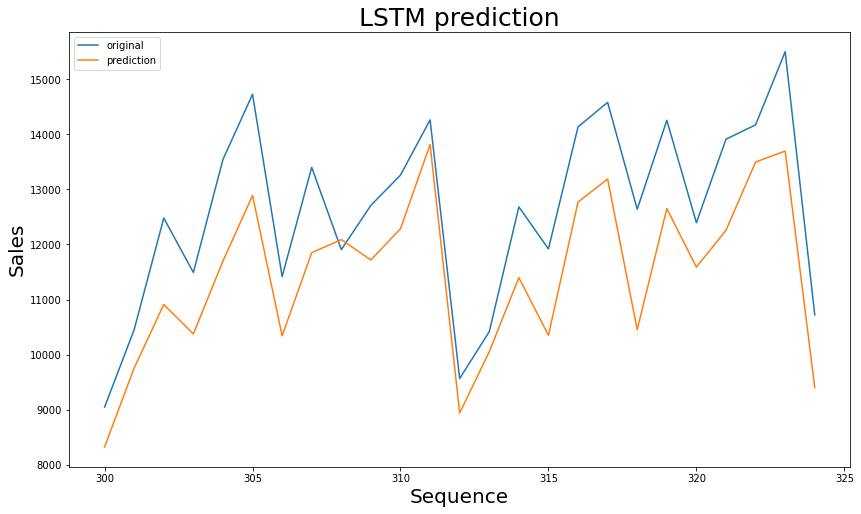

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('LSTM prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 18ms/step - loss: 0.0875 - mae: 0.2713


[0.0875258669257164, 0.2712627649307251]